Funções comuns usadas na maioria dos exercícios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import tensorflow as tf

In [2]:
# função y = ax^3 +bx^2 +cx +d onde os parâmetros a,b,c,d serão 
# otimizados
#
# x variável da função
# W é o array de parâmetros a,b,c,d
# a = W[0], b = W[1], c = W[2], d = W[3]
def f(x, W):
    a,b,c,d = W
    return a * x**3 + b * x**2 + c * x + d 

In [3]:
# Função de erro que deverá ser minimizada ∑(y - f(x))^2 
def square_error(W):
    error = 0
    for i in range(0, data_size):
        # Calcula o somatório 
        error += (Y[i] - f(X[i], W))**2
    return error

In [4]:
# Calcula as derivadas da função de erro em relação a a,b,c,d e retorna
# em array
def calculate_derivative(W):
    der_a, der_b, der_c, der_d = (0,0,0,0)
    a,b,c,d = W
    for i in range(0, data_size):
        # Derivada parcial em a -  2(y - (ax^3 +bx^2 +cx +d))x^3
        der_a += -2*(Y[i] - (a*X[i]**3 + b*X[i]**2 + c*X[i] + d))*X[i]**3
        # Derivada parcial em b -  2(y - (ax^3 +bx^2 +cx +d))x^2                     
        der_b += -2*(Y[i] - (a*X[i]**3 + b*X[i]**2 + c*X[i] + d))*X[i]**2
        # Derivada parcial em c -  2(y - (ax^3 +bx^2 +cx +d))x 
        der_c += -2*(Y[i] - (a*X[i]**3 + b*X[i]**2 + c*X[i] + d))*X[i]
        # Derivada parcial em d -  2(y - (ax^3 +bx^2 +cx +d))                                               
        der_d += -2*(Y[i] - (a*X[i]**3 + b*X[i]**2 + c*X[i] + d))                   
    return np.array([der_a, der_b, der_c, der_d])    

In [5]:
# Calcula os valores de a,b,c,d da função  ax^3 +bx^2 +cx +d usando o 
# método do gradiente descendente
# W é o array de parâmetros iniciais de a,b,c,d
# a = W[0], b = W[1], c = W[2], d = W[3]
def calculate_gradient_descendent(W, learning_rate, num_iterations):
    a,b,c,d = W
    for i in range(num_iterations):
      der_a, der_b, der_c, der_d = calculate_derivative([a,b,c,d])
      a = a - (learning_rate * der_a)
      b = b - (learning_rate * der_b)
      c = c - (learning_rate * der_c)
      d = d - (learning_rate * der_d)
    return [a,b,c,d]

In [6]:
# Imprime no console os valores do resultado
def print_result(W, error, iterations, learning_rate):
    a,b,c,d = W
    # Imprime na tela os valores de a, b, c, d
    print("Para a função ax^3 +bx^2 +cx +d os valores encontrados foram:")
    print("a = {0}".format(a))    
    print("b = {0}".format(b))    
    print("c = {0}".format(c))    
    print("d = {0}".format(d))    
    print("")
    # Imprime na tela o valor do erro calculado
    if learning_rate == 0:
        print("O Erro foi de {0} para {1} iterações"
              .format(error, iterations))
    else:
        print("O Erro foi de {0} para {1} iterações, learning rate = {2}"
              .format(error, iterations, learning_rate))    

In [7]:
# Cria o gráfico Imprime o calculado e o real
def plot_result(X, Y, Y_estimated):
    # Imprime valores reais em azul
    plt.plot(X, Y, 'bx', label="Valores reais")
    # Imprime valores estimados em verde
    plt.plot(X, Y_estimated, label="Valores estimados", color='g')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, 
               ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

Dados passados pelo exercício

In [8]:
# Dados da variável x da função y = ax^3 +bx^2 +cx +d
X = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
# Valor de y (target) da função y = ax^3 +bx^2 +cx +d
Y= np.array([-53.9, -28.5, -20.7, -3.6, -9.8, 5.0, 4.2, 5.1, 
             11.4, 27.4, 44.0])
# Tamanho do Dataset
data_size = len(X)

1 - Implemente uma decida do gradiente (escreva explicitamente o código para a 
função que computa o gradiente). Use um learning rate the 1.0e-5, inicie    do 
ponto a=0, b=0, c=0, d=0 e rode 50 iterações. Qual a  solução   encontrada (os 
valores de a, b, c, d) ? Qual o erro na solução ? Plote a função com os valores 
solução em conjunto com os dados. 

**Reposta: Segue a execução abaixo com os resultados**

Para a função ax^3 +bx^2 +cx +d os valores encontrados foram:
a = 0.40582177917151363
b = -0.15346867249318638
c = 0.05946159028323151
d = -0.00842238093945387

O Erro foi de 224.10780405140483 para 50 iterações, learning rate = 1e-05


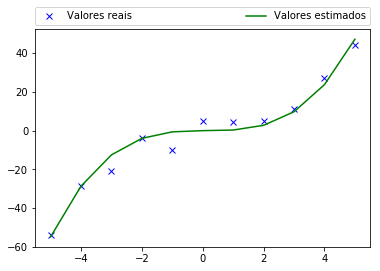

In [9]:
#Exercício 1
learning_rate = 1e-5
# Número de iterações que será executado para realizar a otimização
num_it = 50
# Valores inciais de a,b,c  a = W[0], b = W[1], c = W[2], d = W[3] 
# da função y = ax^3 +bx^2 +cx +d
W = np.array([0,0,0,0])
# Executa o o método do gradiente descendente para encontrar os valores 
# de a,b,c,d da função  y = ax^3 +bx^2 +cx +d
# com 50 iterações tentando minizar o erro quadrático ∑(y - f(x))^2 
W_estimated = calculate_gradient_descendent(W, learning_rate, num_it)
# Com os dados de a,b,c,d encontrados calcular qual erro foi obtido
error = square_error(W_estimated)
# Calula os valores estimados usando os parâmetros encontrados
Y_estimated = np.empty([data_size])
# Preenche o vetor de valores estimados usando a função otimizada
for i in range(data_size):
    Y_estimated[i] = f(X[i], W_estimated)
#Imprime os resultados
print_result(W_estimated, error, num_it, learning_rate)
# Gera os gráficos
plot_result(X, Y, Y_estimated)

2 - Use a decida do gradiente com learning rate de 1.e-4 (para convergir mais 
rápido). O que aconteceu ? 

**Resposta: O Learning Rate foi aumentado com a intenção de convergir mais rápido, 
mas não teve o efeito desejado porque os passos da descida do gradiente ficaram 
muito grandes e com isso o algoritmo  passou direto  pelos pontos  de  mínimo não os  
considerou como possíveis respostas do problema, com isso os valores  foram  ficando 
cada vez maiores e a solução não convergiu. 
A execução  com os resultados utilizando o learning rate 1e-04 estão logo a seguir**

Para a função ax^3 +bx^2 +cx +d os valores encontrados foram:
a = -3.5591826251687275e+42
b = 8.031136005382704e+24
c = -1.6991682510330626e+41
d = -2.7854969837471046e+23

O Erro foi de 5.221304884357691e+89 para 50 iterações, learning rate = 0.0001


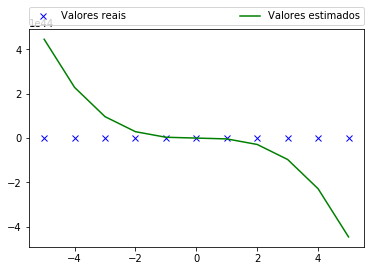

In [10]:
# Exercício 2
learning_rate = 1e-4
# Executa o o método do gradiente descendente para encontrar os valores 
# de a,b,c,d da função  y = ax^3 +bx^2 +cx +d
# com 50 iterações tentando minizar o erro quadrático ∑(y - f(x))^2 
W_estimated = calculate_gradient_descendent(W, learning_rate, num_it)
# Com os dados de a,b,c,d encontrados calcular qual erro foi obtido
error = square_error(W_estimated)
# Preenche o vetor de valores estimados usando a função otimizada
for i in range(data_size):
    Y_estimated[i] = f(X[i], W_estimated)
#Imprime os resultados
print_result(W_estimated, error, num_it, learning_rate)
# Gera os gráficos
plot_result(X, Y, Y_estimated)

3 - Use o método de BFGS do scipy.optimize.minimize. Use o  BFGS sem  jacobiano 
(o método vai computar o Jacobiano usando diferenças finitas). De novo, imprima 
a  solução, o erro  e  plote  a função encontrada e os dados originais. Quantas 
interações foram precisas? 

**Resposta: 7 Iterações**

Optimization terminated successfully.
         Current function value: 127.565070
         Iterations: 7
         Function evaluations: 66
         Gradient evaluations: 11
Para a função ax^3 +bx^2 +cx +d os valores encontrados foram:
a = 0.29123927043411524
b = -0.17995338914154707
c = 2.459577338482138
d = 0.03589747003728112

O Erro foi de 127.56506993008303 para 7 iterações


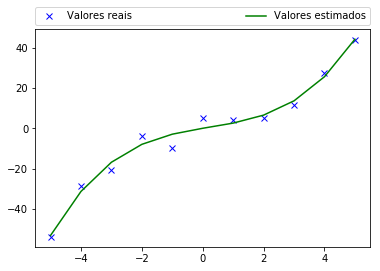

In [11]:
# Exercício 3
# Executa a otimização usando o BFGS
result = opt.minimize(square_error, W, method='BFGS', options={'disp': True})
# Preenche o vetor de valores estimados usando a função otimizada
for i in range(data_size):
    Y_estimated[i] = f(X[i], result.x)
# Imprime os resultados
print_result(result.x, result.fun, result.nit, 0)
# Gera os gráficos
plot_result(X, Y, Y_estimated)


4 - Use o método de BFGS  do  scipy.optimize.minimize.  Use  o  Jacobiano 
(gradiente da solução anterior. Houve diferença entre a solução anterior? 
Mesmo número de chamadas para a função? 

**Resposta: Tivemos menos número de chamadas de função (66 contra 11)**

Optimization terminated successfully.
         Current function value: 127.565070
         Iterations: 7
         Function evaluations: 11
         Gradient evaluations: 11
Para a função ax^3 +bx^2 +cx +d os valores encontrados foram:
a = 0.29123931623931626
b = -0.17995337995338004
c = 2.4595765345765344
d = 0.035897435897436075

O Erro foi de 127.56506993006991 para 7 iterações


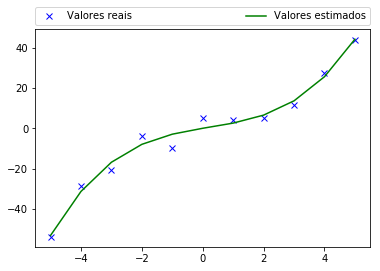

In [12]:
# Exercício 4
# Executa a otimização utilizando o método BFGS usando o jacobiano
result = opt.minimize(square_error, W, method='BFGS', 
                      jac=calculate_derivative, options={'disp': True})
# Preenche o vetor de valores estimados usando a função otimizada
for i in range(data_size):
    Y_estimated[i] = f(X[i], result.x)
# Imprime os resultados
print_result(result.x, result.fun, result.nit, 0)
# Gera os gráficos
plot_result(X, Y, Y_estimated)

5 - Use o método Nelder Mead do  scipy.optimize.minimize.  Imprima e 
plote. Quantas interações?

**Resposta: O erro continuou o mesmo, mas foi necessárias 360 iterações, 
enquanto o BFGS fez 7 iterações**

Optimization terminated successfully.
         Current function value: 127.565070
         Iterations: 360
         Function evaluations: 602
Para a função ax^3 +bx^2 +cx +d os valores encontrados foram:
a = 0.2912411175800449
b = -0.17995509154742637
c = 2.459549512398575
d = 0.03587783917706201

O Erro foi de 127.5650699702508 para 360 iterações


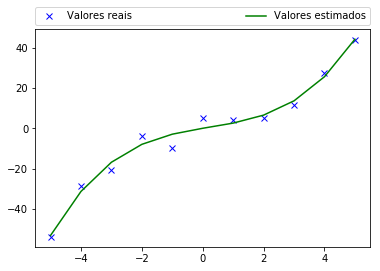

In [13]:
# Exercício 5
# Executa a otimização utilizando o método Melder-mead
result = opt.minimize(square_error, W, method='nelder-mead', options={'disp': True})
for i in range(data_size):
    Y_estimated[i] = f(X[i], result.x)
# Imprime os resultados
print_result(result.x, result.fun, result.nit, 0)
# Gera os gráficos
plot_result(X, Y, Y_estimated)

6 - Implemente  uma  solução usando decida do gradiente usando o Tensorflow.
Use o otimizador AdamOptimizer com learning rate de 0.01. Rode 200 iterações. 
Plote a  solução. Voce pode tanto  usar  uma  otimização SGD (atualização dos 
pesos  um  dado  por  vez  como é mais comum em redes neurais) ou uma solução 
batch (atualização acontece após processar todos  os dados). Mas voce precisa 
dizer na resposta qual das duas voce implementou

**Resposta: A implementação abaixo utilizou uma solução em batch**

Para a função ax^3 +bx^2 +cx +d os valores encontrados foram:
a = 0.3824672996997833
b = -0.1781785786151886
c = 0.561823844909668
d = 0.005529285874217749

O Erro foi de 187.23487854003906 para 200 iterações, learning rate = 0.01


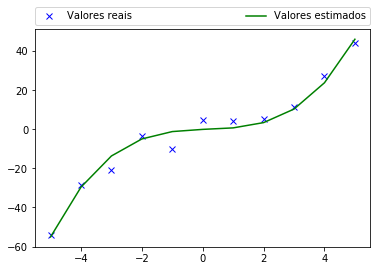

In [14]:
a = tf.Variable(0.0, tf.float32)
b = tf.Variable(0.0, tf.float32)
c = tf.Variable(0.0, tf.float32)
d = tf.Variable(0.0, tf.float32)

x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')

# função y = ax^3 +bx^2 +cx +d
f = a * x **3 + b * x**2 + c * x + d
# Erro quadrático  ∑(y - f(x))^2 
square = tf.reduce_sum(tf.square(y - f))
# Construindo meu modelo
learning_rate = 0.01
train = tf.train.AdamOptimizer(learning_rate).minimize(square)

# Incializando as variaveis  e sessoes
initialize = tf.global_variables_initializer()
session = tf.Session()
session.run(initialize)

# Numero de iteraçoes
num_iterations = 200

# Treina modelo
for i in range(num_iterations):
   session.run(train, feed_dict={x:X, y: Y})

# Calcula
a_res, b_res, c_res, d_res, error = session.run([a,b,c,d, square], 
                                                feed_dict={x:X, y: Y})

# Valores estimados de a,b,c,d em um array
W_estimated = [a_res, b_res, c_res, d_res]
# Valores estimados usando a função otimizada
Y_estimated = np.empty([data_size])

# Preenche o vetor de valores estimados usando a função otimizada
for i in range(data_size):
    Y_estimated[i] = a_res*X[i]**3 + b_res*X[i]**2 + c_res*X[i] + d_res
    
#Imprime os resultados
print_result(W_estimated, error, num_iterations, learning_rate)    
# Gera os gráficos
plot_result(X, Y, Y_estimated)


